In [1]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
filelist = glob.glob('/home/maf3r/nnproject/geoguessr/data/testing_data/*.jpg')

x_test = np.array([np.array(Image.open(fname)) for fname in sorted(filelist)])

print(x_test.shape)

(390, 200, 400, 3)


In [3]:
y_test = []
for j in range(390):
    y_test.append(j // 6)
y_test = np.array(y_test)

In [4]:
model1 = load_model('/home/maf3r/nnproject/model1.h5')

2022-05-01 15:51:09.727079: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-01 15:51:09.727139: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-01 15:51:09.727183: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-maf3r): /proc/driver/nvidia/version does not exist
2022-05-01 15:51:09.727515: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
results = model1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

2022-05-01 15:51:10.555727: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


13/13 [==============================] - 18s 1s/step - loss: 4.1753 - sparse_categorical_accuracy: 0.0179
Test loss: 4.175257682800293
Test accuracy: 0.01794871874153614


In [7]:
# Predict the grid for image at index 0
av = model1.predict(x_test[0:1,:,:,:])
print(av)

[[-9.7438577e-05 -3.5351203e-03  3.4451382e-03  4.9460265e-03
   3.9203633e-03  4.7128745e-03  4.2857816e-03  6.4281514e-04
   2.7480620e-04  3.4770833e-03 -3.8042972e-03 -2.9051316e-03
  -3.5399429e-03  1.4375881e-03  2.2989979e-03  4.1965935e-03
   1.5280354e-03  1.3383749e-03  2.9648589e-03  3.7478625e-03
   4.2069498e-03  2.2267867e-03 -3.4646064e-03  1.5764928e-03
   9.0027624e-04 -4.1558030e-03  2.8071324e-03  1.4901732e-03
   3.6471479e-03 -3.0805981e-03 -3.4800523e-03  3.0209175e-03
  -1.9643460e-03 -3.7715195e-03 -3.1339342e-04 -3.9459565e-03
  -4.6856711e-03 -3.5233803e-03 -2.3624091e-03  3.3202167e-03
   3.4473673e-03  2.7110346e-03  3.1323442e-03  3.8978946e-03
   4.4271760e-03  4.2961910e-03 -1.3119633e-03  3.3928377e-03
   2.0747068e-03 -1.4319129e-03  2.8503067e-03 -3.2617716e-04
   4.2725494e-03  4.4618594e-03  4.4642398e-03  3.7621376e-03
   3.7214982e-03  4.8789396e-03  2.9642789e-03  2.9696927e-03
   4.4229962e-03  3.2635415e-03 -2.8053141e-04  5.3079412e-03
   1.673

In [8]:
mx = np.argmax(av)
mx

63

In [9]:
# Convert prediction to correct grid number
fa = 0

if mx <= 1:
    fa = mx
elif mx >= 2 and mx <= 11:
    fa = mx+8
elif mx == 12:
    fa = 2
elif mx >= 13 and mx <= 22:
    fa = mx+7
elif mx == 23:
    fa = 3
elif mx >= 24 and mx <= 33:
    fa = mx+6
elif mx == 34:
    fa = 4
elif mx >= 35 and mx <= 44:
    fa = mx+5
elif mx == 45:
    fa = 5
elif mx >= 46 and mx <= 55:
    fa = mx+4
elif mx == 56:
    fa = 6
elif mx >= 57 and mx <= 61:
    fa = mx+3
else:
    fa = mx-55

In [10]:
# Model's predicted grid location
fa

8

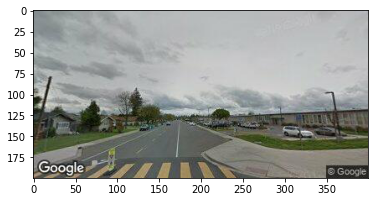

In [11]:
# Actual image
plt.imshow(x_test[0])

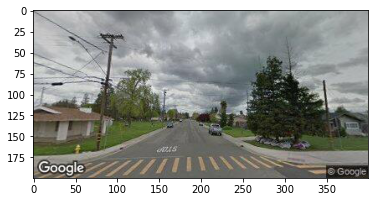

In [12]:
# More images from the actual location
plt.imshow(x_test[1])

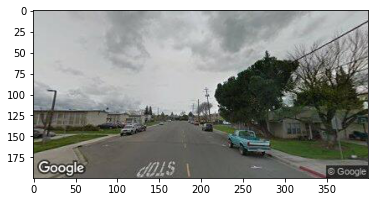

In [13]:
plt.imshow(x_test[2])

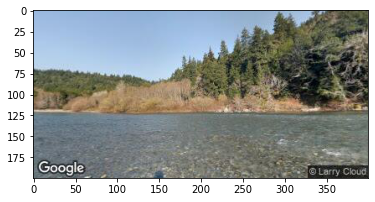

In [14]:
plt.imshow(x_test[3])

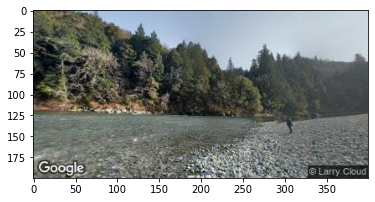

In [15]:
plt.imshow(x_test[4])

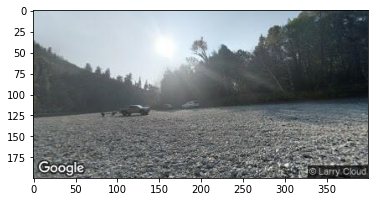

In [16]:
plt.imshow(x_test[5])

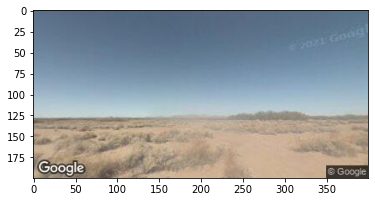

In [17]:
# A picture from the predicted region the picture is from (6 photos for each grid... mx*6 (increment by 1 to get the remaining 5 pictures))
plt.imshow(x_test[mx*6])

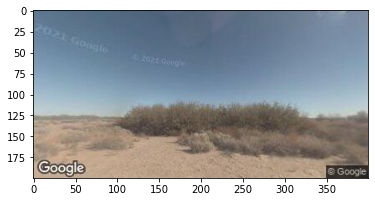

In [18]:
plt.imshow(x_test[mx*6+1])

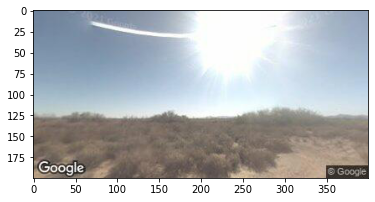

In [19]:
plt.imshow(x_test[mx*6+2])

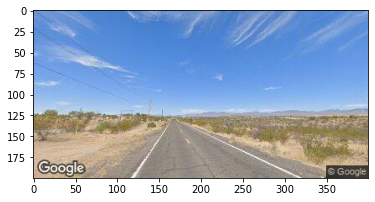

In [20]:
plt.imshow(x_test[mx*6+3])

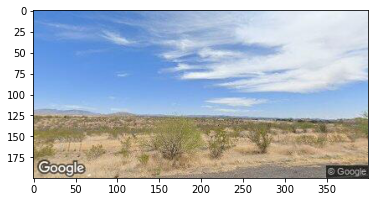

In [21]:
plt.imshow(x_test[mx*6+4])

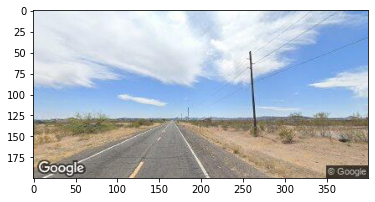

In [22]:
plt.imshow(x_test[mx*6+5])